In [115]:
import re
from abc import *
from typing import *
import numpy as np
import scipy as sp
import mne
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from typing import List, Tuple
from sklearn.model_selection import train_test_split
from nodestimation.learning.selection import collect_statistic, \
    compute_importance, collect_cross_statistic, make_selection_map, \
    select, separate_datasets, selected_statistic, choose_best, selected_data, make_feature_selection
from nodestimation.project import  find_subject_dir
from nodestimation.pipeline import pipeline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import nilearn.plotting as nplt
from nodestimation.project.actions import read
import nodestimation as nd
from nodestimation.project.subject import Subject
from sklearn.preprocessing import *
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier

subjects = pipeline(methods=['wpli', 'psd'],
                    freq_bands=[(0.5, 4), (4, 7), (7, 14), (14, 30), (30, 70)])
labels = subjects[0].dataset[subjects[0].dataset.columns[0]].tolist()
for i in (6, 7, 8):
    subjects[i].dataset = subjects[i].dataset.rename(index={old: new for old, new in zip(labels, range(150))})
for i in (0, 1, 2, 3, 4, 5):
    subjects[i].dataset = subjects[i].dataset.drop([subjects[i].dataset.columns[0]], axis=1)

All computation has been already done, loading of the existing file with the solution...


In [3]:
x = list()
y = list()
add_false = False
for subject in subjects[:len(subjects)-1]:
    for i in subject.dataset.index:
        if subject.dataset.iloc[i]['resected']:
            x.append(subject.dataset.drop(['resected'], axis=1).iloc[i].tolist())
            y.append(int(subject.dataset.iloc[i]['resected']))
            add_false = True
        elif add_false:
            x.append(subject.dataset.drop(['resected'], axis=1).iloc[i].tolist())
            y.append(int(subject.dataset.iloc[i]['resected']))
            add_false = False

x_real = subjects[-1].dataset.drop(['resected'], axis=1).values.tolist()
y_real = [int(sample) for sample in subjects[-1].dataset['resected']]
# true cases: 145, 147

st_scaler = StandardScaler()
mm_scaler = MinMaxScaler()
ma_scaler = MaxAbsScaler()
rb_scaler = RobustScaler()

x_st_sc = st_scaler.fit_transform(x)
x_real_st_sc = st_scaler.fit_transform(x_real)
x_mm_sc = mm_scaler.fit_transform(x)
x_real_mm_sc = mm_scaler.fit_transform(x_real)
x_ma_sc = ma_scaler.fit_transform(x)
x_real_ma_sc = ma_scaler.fit_transform(x_real)
x_rb_sc = rb_scaler.fit_transform(x)
x_real_rb_sc = rb_scaler.fit_transform(x_real)

x_train, x_test, y_train, y_test  = train_test_split(x, y)
x_train_st_sc, x_test_st_sc, y_train_st_sc, y_test_st_sc  = train_test_split(x_st_sc, y)
x_train_mm_sc, x_test_mm_sc, y_train_mm_sc, y_test_mm_sc  = train_test_split(x_mm_sc, y)
x_train_ma_sc, x_test_ma_sc, y_train_ma_sc, y_test_ma_sc  = train_test_split(x_ma_sc, y)
x_train_rb_sc, x_test_rb_sc, y_train_rb_sc, y_test_rb_sc  = train_test_split(x_rb_sc, y)

In [4]:
print('*'*50)





**************************************************


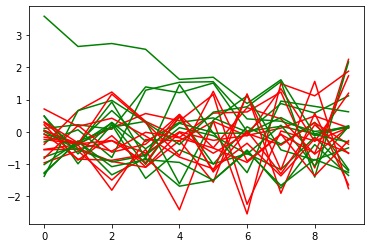

In [112]:
x_train_st_sc_true = [x for x, y in zip(x_train_st_sc, y_train_st_sc) if y == 1]
x_train_st_sc_false = [x for x, y in zip(x_train_st_sc, y_train_st_sc) if y == 0]
x_train_st_sc_true = x_train_st_sc_true[0:len(x_train_st_sc_false)]

plt.plot(
    range(x_train_st_sc_true[0].shape[0]), x_train_st_sc_true[0], 'g',
    range(x_train_st_sc_false[0].shape[0]), x_train_st_sc_false[0], 'r',
    range(x_train_st_sc_true[1].shape[0]), x_train_st_sc_true[1], 'g',
    range(x_train_st_sc_false[1].shape[0]), x_train_st_sc_false[1], 'r',
    range(x_train_st_sc_true[2].shape[0]), x_train_st_sc_true[2], 'g',
    range(x_train_st_sc_false[2].shape[0]), x_train_st_sc_false[2], 'r',
    range(x_train_st_sc_true[3].shape[0]), x_train_st_sc_true[3], 'g',
    range(x_train_st_sc_false[3].shape[0]), x_train_st_sc_false[3], 'r',
    range(x_train_st_sc_true[4].shape[0]), x_train_st_sc_true[4], 'g',
    range(x_train_st_sc_false[4].shape[0]), x_train_st_sc_false[4], 'r',
    range(x_train_st_sc_true[5].shape[0]), x_train_st_sc_true[5], 'g',
    range(x_train_st_sc_false[5].shape[0]), x_train_st_sc_false[5], 'r',
    range(x_train_st_sc_true[6].shape[0]), x_train_st_sc_true[6], 'g',
    range(x_train_st_sc_false[6].shape[0]), x_train_st_sc_false[6], 'r',
    range(x_train_st_sc_true[7].shape[0]), x_train_st_sc_true[7], 'g',
    range(x_train_st_sc_false[7].shape[0]), x_train_st_sc_false[7], 'r',
    range(x_train_st_sc_true[8].shape[0]), x_train_st_sc_true[8], 'g',
    range(x_train_st_sc_false[8].shape[0]), x_train_st_sc_false[8], 'r',
    range(x_train_st_sc_true[9].shape[0]), x_train_st_sc_true[9], 'g',
    range(x_train_st_sc_false[9].shape[0]), x_train_st_sc_false[9], 'r',
    range(x_train_st_sc_true[10].shape[0]), x_train_st_sc_true[10], 'g',
    range(x_train_st_sc_false[10].shape[0]), x_train_st_sc_false[10], 'r',
    range(x_train_st_sc_true[11].shape[0]), x_train_st_sc_true[11], 'g',
    range(x_train_st_sc_false[11].shape[0]), x_train_st_sc_false[11], 'r',
    range(x_train_st_sc_true[12].shape[0]), x_train_st_sc_true[12], 'g',
    range(x_train_st_sc_false[12].shape[0]), x_train_st_sc_false[12], 'r',
)
plt.show()
# print(len(x_train_st_sc_true), ', ', len(x_train_st_sc_false))

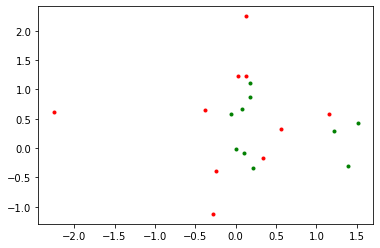

In [113]:
x_train_st_sc_true = np.array(x_train_st_sc_true)
x_train_st_sc_false = np.array(x_train_st_sc_false)
# print(x_train_st_sc_true.shape, x_train_st_sc_false.shape)
wpli05_4Hz_true = x_train_st_sc_true[0, :]
psd05_4Hz_true = x_train_st_sc_true[1, :]
wpli05_4Hz_false = x_train_st_sc_false[0, :]
psd05_4Hz_false = x_train_st_sc_false[1, :]
plt.plot(wpli05_4Hz_true, psd05_4Hz_true, '.g',
         wpli05_4Hz_false, psd05_4Hz_false, '.r')

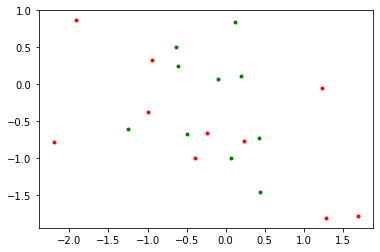

In [83]:
x_train_st_sc_true = np.array(x_train_st_sc_true)
x_train_st_sc_false = np.array(x_train_st_sc_false)
# print(x_train_st_sc_true.shape, x_train_st_sc_false.shape)
wpli4_7Hz_true = x_train_st_sc_true[2, :]
psd4_7Hz_true = x_train_st_sc_true[3, :]
wpli4_7Hz_false = x_train_st_sc_false[2, :]
psd4_7Hz_false = x_train_st_sc_false[3, :]
plt.plot(wpli4_7Hz_true, psd4_7Hz_true, '.g',
         wpli4_7Hz_false, psd4_7Hz_false, '.r')

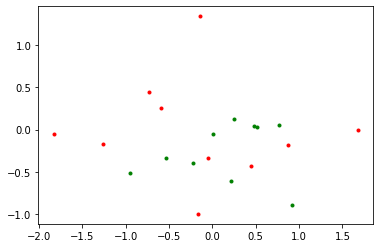

In [84]:
x_train_st_sc_true = np.array(x_train_st_sc_true)
x_train_st_sc_false = np.array(x_train_st_sc_false)
# print(x_train_st_sc_true.shape, x_train_st_sc_false.shape)
wpli7_14Hz_true = x_train_st_sc_true[4, :]
psd7_14Hz_true = x_train_st_sc_true[5, :]
wpli7_14Hz_false = x_train_st_sc_false[4, :]
psd7_14Hz_false = x_train_st_sc_false[5, :]
plt.plot(wpli7_14Hz_true, psd7_14Hz_true, '.g',
         wpli7_14Hz_false, psd7_14Hz_false, '.r')

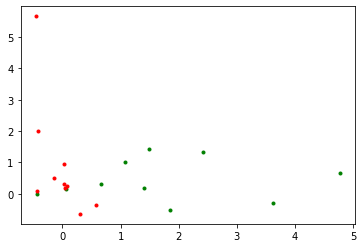

In [85]:
x_train_st_sc_true = np.array(x_train_st_sc_true)
x_train_st_sc_false = np.array(x_train_st_sc_false)
# print(x_train_st_sc_true.shape, x_train_st_sc_false.shape)
wpli14_30Hz_true = x_train_st_sc_true[6, :]
psd14_30Hz_true = x_train_st_sc_true[7, :]
wpli14_30Hz_false = x_train_st_sc_false[6, :]
psd14_30Hz_false = x_train_st_sc_false[7, :]
plt.plot(wpli14_30Hz_true, psd14_30Hz_true, '.g',
         wpli14_30Hz_false, psd14_30Hz_false, '.r')

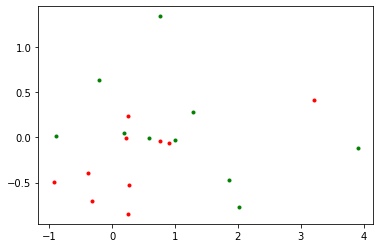

In [86]:
x_train_st_sc_true = np.array(x_train_st_sc_true)
x_train_st_sc_false = np.array(x_train_st_sc_false)
# print(x_train_st_sc_true.shape, x_train_st_sc_false.shape)
wpli30_70Hz_true = x_train_st_sc_true[8, :]
psd30_70Hz_true = x_train_st_sc_true[9, :]
wpli30_70Hz_false = x_train_st_sc_false[8, :]
psd30_70Hz_false = x_train_st_sc_false[9, :]
plt.plot(wpli30_70Hz_true, psd30_70Hz_true, '.g',
         wpli30_70Hz_false, psd30_70Hz_false, '.r')

In [111]:
print('*'*50)





**************************************************
(15, 10)
[1.68964346e-02 2.76064754e+01 1.29585862e-02 1.14421559e+01
 1.02755421e-02 1.57866503e+01 7.65520029e-03 9.32957189e+00
 4.21443424e-03 9.46548571e+00]
[8.03630077e-03 3.51348482e+01 1.10968826e-02 9.17100176e+00
 7.60297156e-03 1.28002269e+01 7.07707477e-03 6.03119065e+00
 5.09490671e-03 9.07263359e+00]
r1:  7.3682339310533695
r2:  7.224880923825833
distance:  550.7450497473083


In [114]:
print(x_train_st_sc_true.shape)
print(np.std(x_train_st_sc_true, axis=0))
print(np.std(x_train_st_sc_false, axis=0))
sq = 0
for x, y in zip(np.mean(x_train_st_sc_true, axis=0), np.mean(x_train_st_sc_false, axis=0)):
    sq += (x - y)**2
print('r1: ', np.mean(np.std(x_train_st_sc_true, axis=0)))
print('r2: ', np.mean(np.std(x_train_st_sc_false, axis=0)))
print('distance: ', np.square(sq))

(13, 10)
[1.24686543 0.87586994 1.04215498 1.12541956 1.09629391 1.06565507
 0.68129502 1.06503901 0.62050223 0.99757148]
[0.46514314 0.41336789 0.87341209 0.52786866 0.75911414 0.89304607
 1.1146479  1.04936759 0.81654005 1.23225522]
r1:  0.9816666620397623
r2:  0.8144762754945967
distance:  0.7345083814778196


In [459]:
print('SVM')
clf = svm.SVC()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
print('prediction: ', pred)
print('actually:   ', np.array(y_test))
print('Accuracy without any scaling (test): ', accuracy_score(y_test, pred))
pred = clf.predict(x_real)
print(pred)
print('Accuracy without any scaling (real): ', accuracy_score(y_real, pred))
print('Prediction for true cases: ', clf.predict([x_real[145], x_real[147]]))

SVM
prediction:  [0 1 1 0 0 0 0 1 1 1]
actually:    [1 0 0 1 1 1 0 0 1 0]
Accuracy without any scaling (test):  0.2
[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1
 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0
 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0
 1 0]
Accuracy without any scaling (real):  0.23333333333333334
Prediction for true cases:  [0 0]


In [460]:
print('SVM')
clf = svm.SVC()
clf.fit(x_train_st_sc, y_train_st_sc)
pred_st_sc = clf.predict(x_test_st_sc)
print('prediction: ', pred_st_sc)
print('actually:   ', np.array(y_test_st_sc))
print('Accuracy using StandardScaler (test): ', accuracy_score(y_test_st_sc, pred_st_sc))
pred_st_sc = clf.predict(x_real_st_sc)
print(pred_st_sc)
print('Accuracy using StandardScaler (real): ', accuracy_score(y_real, pred_st_sc))
print('Prediction for true cases: ', clf.predict([x_real_st_sc[145], x_real_st_sc[147]]))

SVM
prediction:  [1 0 1 1 1 1 1 1 1 1]
actually:    [0 1 0 0 0 0 0 1 1 0]
Accuracy using StandardScaler (test):  0.2
[1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1
 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1
 1 0]
Accuracy using StandardScaler (real):  0.28
Prediction for true cases:  [0 1]


In [461]:
print('SVM')
clf = svm.SVC()
clf.fit(x_train_mm_sc, y_train_mm_sc)
pred_mm_sc = clf.predict(x_test_mm_sc)
print('prediction: ', pred_mm_sc)
print('actually:   ', np.array(y_test_mm_sc))
print('Accuracy using MinMaxStandardScaler (test): ', accuracy_score(y_test_mm_sc, pred_mm_sc))
pred_mm_sc = clf.predict(x_real_mm_sc)
print(pred_mm_sc)
print('Accuracy using MinMaxStandardScaler (real): ', accuracy_score(y_real, pred_mm_sc))
print('Prediction for true cases: ', clf.predict([x_real_mm_sc[145], x_real_mm_sc[147]]))

SVM
prediction:  [0 0 1 1 0 0 0 0 0 0]
actually:    [1 0 1 0 0 1 1 0 1 1]
Accuracy using MinMaxStandardScaler (test):  0.4
[0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1
 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1
 1 1]
Accuracy using MinMaxStandardScaler (real):  0.7266666666666667
Prediction for true cases:  [0 1]


In [462]:
print('SVM')
clf = svm.SVC()
clf.fit(x_train_ma_sc, y_train_ma_sc)
pred_ma_sc = clf.predict(x_test_ma_sc)
print('prediction: ', pred_ma_sc)
print('actually:   ', np.array(y_test_ma_sc))
print('Accuracy using MaxAbsScaler (test): ', accuracy_score(y_test_ma_sc, pred_ma_sc))
pred_ma_sc = clf.predict(x_real_ma_sc)
print(pred_ma_sc)
print('Accuracy using MaxAbsScaler (real): ', accuracy_score(y_real, pred_ma_sc))
print('Prediction for true cases: ', clf.predict([x_real_ma_sc[145], x_real_ma_sc[147]]))

SVM
prediction:  [1 0 1 1 1 1 1 1 1 1]
actually:    [0 1 0 0 0 1 1 1 0 0]
Accuracy using MaxAbsScaler (test):  0.3
[1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0
 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0
 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0
 0 0]
Accuracy using MaxAbsScaler (real):  0.36
Prediction for true cases:  [0 0]


In [503]:
print('SVM')
clf = svm.SVC()
clf.fit(x_train_rb_sc, y_train_rb_sc)
pred_rb_sc = clf.predict(x_test_rb_sc)
print('prediction: ', pred_rb_sc)
print('actually:   ', np.array(y_test_rb_sc))
print('Accuracy using RobustScaler (test): ', accuracy_score(y_test_rb_sc, pred_rb_sc))
pred_rb_sc = clf.predict(x_real_rb_sc)
print(pred_rb_sc)
print('Accuracy using RobustScaler (real): ', accuracy_score(y_real, pred_rb_sc))
print('Prediction for true cases: ', clf.predict([x_real_rb_sc[145], x_real_rb_sc[147]]))

SVM
prediction:  [0 1 0 0 0 0 0 0 0 0]
actually:    [1 1 1 0 1 0 1 1 0 0]
Accuracy using RobustScaler (test):  0.5
[0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1
 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0
 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1
 1 1]
Accuracy using RobustScaler (real):  0.6266666666666667
Prediction for true cases:  [0 1]


In [232]:
print('*'*50)



**************************************************


In [464]:
print('NearestNeighbours')
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)
pred = neigh.predict(x_test)
print('prediction: ', pred)
print('actually:   ', np.array(y_test))
print('Accuracy without any scaling (test): ', accuracy_score(y_test, pred))
pred = neigh.predict(x_real)
print(pred)
print('Accuracy without any scaling (real): ', accuracy_score(y_real, pred))
print('Prediction for true cases: ', clf.predict([x_real[145], x_real[147]]))

NearestNeighbours
prediction:  [0 1 1 0 0 0 0 1 1 1]
actually:    [1 0 0 1 1 1 0 0 1 0]
Accuracy without any scaling (test):  0.2
[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1
 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0
 1 0]
Accuracy without any scaling (real):  0.32
Prediction for true cases:  [0 0]


In [465]:
print('NearestNeighbours')
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train_st_sc, y_train_st_sc)
pred_st_sc = neigh.predict(x_test_st_sc)
print('prediction: ', pred_st_sc)
print('actually:   ', np.array(y_test_st_sc))
print('Accuracy using StandardScaler (train): ', accuracy_score(y_test_st_sc, pred_st_sc))
pred_st_sc = neigh.predict(x_real_st_sc)
print(pred_st_sc)
print('Accuracy using StandardScaler (test): ', accuracy_score(y_real, pred_st_sc))
print('Prediction for true cases: ', clf.predict([x_real_st_sc[145], x_real_st_sc[147]]))


NearestNeighbours
prediction:  [1 0 1 1 1 1 1 1 1 1]
actually:    [0 1 0 0 0 0 0 1 1 0]
Accuracy using StandardScaler (train):  0.2
[0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1
 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0
 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1
 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1
 1 1]
Accuracy using StandardScaler (test):  0.29333333333333333
Prediction for true cases:  [0 1]


In [466]:
print('NearestNeighbours')
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train_mm_sc, y_train_mm_sc)
pred_mm_sc = neigh.predict(x_test_mm_sc)
print('prediction: ', pred_mm_sc)
print('actually:   ', np.array(y_test_mm_sc))
print('Accuracy using MinMaxStandardScaler (test): ', accuracy_score(y_test_mm_sc, pred_mm_sc))
pred_mm_sc = neigh.predict(x_real_mm_sc)
print(pred_mm_sc)
print('Accuracy using MinMaxStandardScaler (real): ', accuracy_score(y_real, pred_mm_sc))
print('Prediction for true cases: ', clf.predict([x_real_mm_sc[145], x_real_mm_sc[147]]))


NearestNeighbours
prediction:  [0 0 1 1 1 0 0 0 0 0]
actually:    [1 0 1 0 0 1 1 0 1 1]
Accuracy using MinMaxStandardScaler (test):  0.3
[0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1
 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0
 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0
 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1
 1 0]
Accuracy using MinMaxStandardScaler (real):  0.6133333333333333
Prediction for true cases:  [1 1]


In [469]:
print('NearestNeighbours')
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train_ma_sc, y_train_ma_sc)
pred_ma_sc = neigh.predict(x_test_ma_sc)
print('prediction: ', pred_ma_sc)
print('actually:   ', np.array(y_test_ma_sc))
print('Accuracy using MaxAbsScaler (test): ', accuracy_score(y_test_ma_sc, pred_ma_sc))
pred_ma_sc = neigh.predict(x_real_ma_sc)
print(pred_ma_sc)
print('Accuracy using MaxAbsScaler (real): ', accuracy_score(y_real, pred_ma_sc))
print('Prediction for true cases: ', clf.predict([x_real_ma_sc[145], x_real_ma_sc[147]]))


NearestNeighbours
prediction:  [1 0 1 1 1 1 0 1 0 1]
actually:    [0 1 0 0 0 1 1 1 0 0]
Accuracy using MaxAbsScaler (test):  0.3
[1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0
 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0
 0 0]
Accuracy using MaxAbsScaler (real):  0.5333333333333333
Prediction for true cases:  [1 1]


In [504]:
print('NearestNeighbours')
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train_rb_sc, y_train_rb_sc)
pred_rb_sc = neigh.predict(x_test_rb_sc)
print('prediction: ', pred_rb_sc)
print('actually:   ', np.array(y_test_rb_sc))
print('Accuracy using RobustScaler (test): ', accuracy_score(y_test_rb_sc, pred_rb_sc))
pred_rb_sc = neigh.predict(x_real_rb_sc)
print(pred_rb_sc)
print('Accuracy using RobustScaler (real): ', accuracy_score(y_real, pred_rb_sc))
print('Prediction for true cases: ', clf.predict([x_real_rb_sc[145], x_real_rb_sc[147]]))

NearestNeighbours
prediction:  [0 1 1 0 0 0 0 0 0 0]
actually:    [1 1 1 0 1 0 1 1 0 0]
Accuracy using RobustScaler (test):  0.6
[0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1
 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0
 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0
 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1
 1 1]
Accuracy using RobustScaler (real):  0.5733333333333334
Prediction for true cases:  [0 1]


In [250]:
print('*'*50)






**************************************************


In [480]:
print('LogisticRegression')
reg = LogisticRegression()
reg.fit(x_train, y_train)
print('Score without any scaling (train): ', reg.score(x_train, y_train))
print('Score without any scaling (test): ', reg.score(x_test, y_test))
print('Prediction for true cases: ', clf.predict([x_real[145], x_real[147]]))

LogisticRegression
Score without any scaling (train):  0.7
Score without any scaling (test):  0.5
Prediction for true cases:  [0 0]


In [481]:
print('LogisticRegression')
reg = LogisticRegression()
reg.fit(x_train_st_sc, y_train_st_sc)
print('Score using StandardScaler (train): ', reg.score(x_train_st_sc, y_train_st_sc))
print('Score using StandardScaler (test): ', reg.score(x_test_st_sc, y_test_st_sc))
print('Prediction for true cases: ', clf.predict([x_real_st_sc[145], x_real_st_sc[147]]))

LogisticRegression
Score using StandardScaler (train):  0.7666666666666667
Score using StandardScaler (train):  0.2
Prediction for true cases:  [0 1]


In [483]:
print('LogisticRegression')
reg = LogisticRegression()
reg.fit(x_train_mm_sc, y_train_mm_sc)
print('Score using MinMaxStandardScaler (train): ', reg.score(x_train_mm_sc, y_train_mm_sc))
print('Score using MinMaxStandardScaler (test): ', reg.score(x_test_mm_sc, y_test_mm_sc))
print('Prediction for true cases: ', clf.predict([x_real_mm_sc[145], x_real_mm_sc[147]]))

LogisticRegression
Score using MinMaxStandardScaler (train):  0.7
Score using MinMaxStandardScaler (test):  0.5
Prediction for true cases:  [1 1]


In [484]:
print('LogisticRegression')
reg = LogisticRegression()
reg.fit(x_train_ma_sc, y_train_ma_sc)
print('Score using MaxAbsScaler (train): ', reg.score(x_train_ma_sc, y_train_ma_sc))
print('Score using MaxAbsScaler (test): ', reg.score(x_test_ma_sc, y_test_ma_sc))
print('Prediction for true cases: ', clf.predict([x_real_ma_sc[145], x_real_ma_sc[147]]))

LogisticRegression
Score using MaxAbsScaler (train):  0.6333333333333333
Score using MaxAbsScaler (test):  0.3
Prediction for true cases:  [1 1]


In [505]:
print('LogisticRegression')
reg = LogisticRegression()
reg.fit(x_train_rb_sc, y_train_rb_sc)
print('Score using RobustScaler (train): ', reg.score(x_train_rb_sc, y_train_rb_sc))
print('Score using RobustScaler (test): ', reg.score(x_test_rb_sc, y_test_rb_sc))
print('Prediction for true cases: ', clf.predict([x_real_rb_sc[145], x_real_rb_sc[147]]))

LogisticRegression
Score using RobustScaler (train):  0.7333333333333333
Score using RobustScaler (test):  0.4
Prediction for true cases:  [0 1]


In [495]:
print('*'*50)






**************************************************


In [486]:
print('RandomForest')
acc = list()
for i in range(11):
    clf = RandomForestClassifier(max_depth=20)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    acc.append(accuracy_score(y_test, pred))
print('Accuracy without any scaling: ', sum(acc)/len(acc))
print('Prediction for true cases: ', clf.predict([x_real[145], x_real[147]]))

RandomForest
Accuracy without any scaling:  0.5727272727272726
Prediction for true cases:  [0 1]


In [487]:
print('RandomForest')
acc = list()
for i in range(11):
    clf = RandomForestClassifier(max_depth=20)
    clf.fit(x_train_st_sc, y_train_st_sc)
    pred_st_sc = clf.predict(x_test_st_sc)
    acc.append(accuracy_score(y_test_st_sc, pred_st_sc))
print('Accuracy using StandardScaler: ', sum(acc)/len(acc))
print('Prediction for true cases: ', clf.predict([x_real_st_sc[145], x_real_st_sc[147]]))

RandomForest
Accuracy using StandardScaler:  0.21818181818181823
Prediction for true cases:  [0 1]


In [507]:
print('RandomForest')
acc = list()
for i in range(11):
    clf = RandomForestClassifier(max_depth=20)
    clf.fit(x_train_mm_sc, y_train_mm_sc)
    pred_mm_sc = clf.predict(x_test_mm_sc)
    acc.append(accuracy_score(y_test_mm_sc, pred_mm_sc))
print('Accuracy using MinMaxScaler: ', sum(acc)/len(acc))
print('Prediction for true cases: ', clf.predict([x_real_mm_sc[145], x_real_mm_sc[147]]))

RandomForest
Accuracy using MinMaxScaler:  0.5
Prediction for true cases:  [0 1]


In [493]:
print('RandomForest')
acc = list()
for i in range(11):
    clf = RandomForestClassifier(max_depth=20)
    clf.fit(x_train_ma_sc, y_train_ma_sc)
    pred_ma_sc = clf.predict(x_test_ma_sc)
    acc.append(accuracy_score(y_test_ma_sc, pred_ma_sc))
print('Accuracy using MaxAbsScaler: ', sum(acc)/len(acc))
print('Prediction for true cases: ', clf.predict([x_real_ma_sc[145], x_real_ma_sc[147]]))

RandomForest
Accuracy using MaxAbsScaler:  0.6
Prediction for true cases:  [0 1]


In [506]:
print('RandomForest')
acc = list()
for i in range(11):
    clf = RandomForestClassifier(max_depth=20)
    clf.fit(x_train_rb_sc, y_train_rb_sc)
    pred_rb_sc = clf.predict(x_test_rb_sc)
    acc.append(accuracy_score(y_test_rb_sc, pred_rb_sc))
print('Accuracy using RobustScaler: ', sum(acc)/len(acc))
print('Prediction for true cases: ', clf.predict([x_real_rb_sc[145], x_real_rb_sc[147]]))

RandomForest
Accuracy using RobustScaler:  0.49090909090909096
Prediction for true cases:  [0 1]


In [ ]:
print('*'*50)






In [ ]:
def stat(pred_test, pred_real, y_test, y_real, scaler):
    print('prediction: ', pred_test)
    print('actually:   ', np.array(y_test))
    print('Accuracy using {} (test): '.format(scaler), accuracy_score(y_test, pred_test))
    print(pred_real)
    print('Accuracy using {} (real): '.format(scaler), accuracy_score(y_real, pred_real))

In [497]:
print('Naive Bayes')
clf = GaussianNB()
clf.fit(x_train, y_train)
pred_test = clf.predict(x_test)
pred_real = clf.predict(x_real)
stat(pred_test, pred_real, y_test, y_real, 'nothing')
print('Prediction for true cases: ', clf.predict([x_real[145], x_real[147]]))


Naive Bayes
prediction:  [0 0 0 0 1 1 0 0 0 0]
actually:    [1 0 0 1 1 1 0 0 1 0]
Accuracy using nothing (test):  0.7
[1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0
 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0
 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1
 1 1]
Accuracy using nothing (real):  0.35333333333333333
Prediction for true cases:  [1 1]


In [498]:
print('Naive Bayes')
clf = GaussianNB()
clf.fit(x_train_st_sc, y_train_st_sc)
pred_test = clf.predict(x_test_st_sc)
pred_real = clf.predict(x_real_st_sc)
stat(pred_test, pred_real, y_test_st_sc, y_real, 'StandardScaler')
print('Prediction for true cases: ', clf.predict([x_real_st_sc[145], x_real_st_sc[147]]))

Naive Bayes
prediction:  [1 0 1 1 0 1 1 0 1 1]
actually:    [0 1 0 0 0 0 0 1 1 0]
Accuracy using StandardScaler (test):  0.2
[1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1
 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1
 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1
 0 0]
Accuracy using StandardScaler (real):  0.43333333333333335
Prediction for true cases:  [0 1]


In [501]:
print('Naive Bayes')
clf = GaussianNB()
clf.fit(x_train_mm_sc, y_train_mm_sc)
pred_test = clf.predict(x_test_mm_sc)
pred_real = clf.predict(x_real_mm_sc)
stat(pred_test, pred_real, y_test_mm_sc, y_real, 'MinMaxScaler')
print('Prediction for true cases: ', clf.predict([x_real_mm_sc[145], x_real_mm_sc[147]]))

Naive Bayes
prediction:  [0 0 1 0 0 0 0 0 1 0]
actually:    [1 0 1 0 0 1 1 0 1 1]
Accuracy using MinMaxScaler (test):  0.6
[0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1
 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0
 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0
 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1
 1 1]
Accuracy using MinMaxScaler (real):  0.54
Prediction for true cases:  [0 1]


In [502]:
print('Naive Bayes')
clf = GaussianNB()
clf.fit(x_train_ma_sc, y_train_ma_sc)
pred_test = clf.predict(x_test_ma_sc)
pred_real = clf.predict(x_real_ma_sc)
stat(pred_test, pred_real, y_test_ma_sc, y_real, 'MaxAbsScaler')
print('Prediction for true cases: ', clf.predict([x_real_ma_sc[145], x_real_ma_sc[147]]))


Naive Bayes
prediction:  [1 0 1 1 1 1 1 1 0 1]
actually:    [0 1 0 0 0 1 1 1 0 0]
Accuracy using MaxAbsScaler (test):  0.4
[0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0
 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0
 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1
 0 0]
Accuracy using MaxAbsScaler (real):  0.6466666666666666
Prediction for true cases:  [0 1]


In [508]:
print('Naive Bayes')
clf = GaussianNB()
clf.fit(x_train_rb_sc, y_train_rb_sc)
pred_test = clf.predict(x_test_rb_sc)
pred_real = clf.predict(x_real_rb_sc)
stat(pred_test, pred_real, y_test_rb_sc, y_real, 'RobustScaler')
print('Prediction for true cases: ', clf.predict([x_real_rb_sc[145], x_real_rb_sc[147]]))

Naive Bayes
prediction:  [0 1 0 0 0 0 0 0 0 0]
actually:    [1 1 1 0 1 0 1 1 0 0]
Accuracy using RobustScaler (test):  0.5
[0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0
 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0
 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1
 1 1]
Accuracy using RobustScaler (real):  0.5866666666666667
Prediction for true cases:  [0 1]


In [513]:
print('*'*50)






**************************************************


In [512]:
print('LinearDiscriminantAnalysis')
clf = LinearDiscriminantAnalysis()
clf.fit(x_train, y_train)
pred_test = clf.predict(x_test)
pred_real = clf.predict(x_real)
stat(pred_test, pred_real, y_test, y_real, 'nothing')
print('Prediction for true cases: ', clf.predict([x_real[145], x_real[147]]))

LinearDiscriminantAnalysis
prediction:  [0 1 0 0 1 1 1 0 1 0]
actually:    [1 0 0 1 1 1 0 0 1 0]
Accuracy using nothing (test):  0.6
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
Accuracy using nothing (real):  0.08
Prediction for true cases:  [1 1]


In [514]:
print('LinearDiscriminantAnalysis')
clf = LinearDiscriminantAnalysis()
clf.fit(x_train_st_sc, y_train_st_sc)
pred_test = clf.predict(x_test_st_sc)
pred_real = clf.predict(x_real_st_sc)
stat(pred_test, pred_real, y_test_st_sc, y_real, 'StandardScaler')
print('Prediction for true cases: ', clf.predict([x_real_st_sc[145], x_real_st_sc[147]]))

LinearDiscriminantAnalysis
prediction:  [1 0 1 1 1 1 1 0 1 1]
actually:    [0 1 0 0 0 0 0 1 1 0]
Accuracy using StandardScaler (test):  0.1
[1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0
 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0
 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1
 0 0]
Accuracy using StandardScaler (real):  0.38
Prediction for true cases:  [0 1]


In [515]:
print('LinearDiscriminantAnalysis')
clf = LinearDiscriminantAnalysis()
clf.fit(x_train_mm_sc, y_train_mm_sc)
pred_test = clf.predict(x_test_mm_sc)
pred_real = clf.predict(x_real_mm_sc)
stat(pred_test, pred_real, y_test_mm_sc, y_real, 'MinMaxScaler')
print('Prediction for true cases: ', clf.predict([x_real_mm_sc[145], x_real_mm_sc[147]]))

LinearDiscriminantAnalysis
prediction:  [0 0 1 1 1 0 0 0 0 1]
actually:    [1 0 1 0 0 1 1 0 1 1]
Accuracy using MinMaxScaler (test):  0.4
[1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1
 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0
 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0
 1 1]
Accuracy using MinMaxScaler (real):  0.5333333333333333
Prediction for true cases:  [0 0]


In [516]:
print('LinearDiscriminantAnalysis')
clf = LinearDiscriminantAnalysis()
clf.fit(x_train_ma_sc, y_train_ma_sc)
pred_test = clf.predict(x_test_ma_sc)
pred_real = clf.predict(x_real_ma_sc)
stat(pred_test, pred_real, y_test_ma_sc, y_real, 'MinMaxScaler')
print('Prediction for true cases: ', clf.predict([x_real_ma_sc[145], x_real_ma_sc[147]]))

LinearDiscriminantAnalysis
prediction:  [0 1 0 1 1 1 1 1 0 1]
actually:    [0 1 0 0 0 1 1 1 0 0]
Accuracy using MinMaxScaler (test):  0.7
[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0
 1 1]
Accuracy using MinMaxScaler (real):  0.22
Prediction for true cases:  [1 0]


In [518]:
print('LinearDiscriminantAnalysis')
clf = LinearDiscriminantAnalysis()
clf.fit(x_train_rb_sc, y_train_rb_sc)
pred_test = clf.predict(x_test_rb_sc)
pred_real = clf.predict(x_real_rb_sc)
stat(pred_test, pred_real, y_test_rb_sc, y_real, 'MinMaxScaler')
print('Prediction for true cases: ', clf.predict([x_real_rb_sc[145], x_real_rb_sc[147]]))


LinearDiscriminantAnalysis
prediction:  [0 1 0 0 0 0 0 0 0 1]
actually:    [1 1 1 0 1 0 1 1 0 0]
Accuracy using MinMaxScaler (test):  0.4
[1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0
 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0
 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 0
 0 1]
Accuracy using MinMaxScaler (real):  0.56
Prediction for true cases:  [0 0]


In [519]:
print('*'*50)





**************************************************


In [662]:
print('KMeans')
clf = KMeans(n_clusters=2, algorithm='full')
clf.fit(x_train, y_train)
pred_test = clf.predict(x_test)
pred_real = clf.predict(x_real)
stat(pred_test, pred_real, y_test, y_real, 'nothing')
print('Prediction for true cases: ', clf.predict([x_real[145], x_real[147]]))

KMeans
prediction:  [0 0 0 0 1 0 0 0 0 0]
actually:    [1 0 0 1 1 1 0 0 1 0]
Accuracy using nothing (test):  0.6
[0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1
 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0
 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 1
 1 1]
Accuracy using nothing (real):  0.5
Prediction for true cases:  [1 1]


In [663]:
print('KMeans')
clf = KMeans(n_clusters=2, algorithm='full')
clf.fit(x_train_st_sc, y_train_st_sc)
pred_test = clf.predict(x_test_st_sc)
pred_real = clf.predict(x_real_st_sc)
stat(pred_test, pred_real, y_test_st_sc, y_real, 'StandardScaler')
print('Prediction for true cases: ', clf.predict([x_real_st_sc[145], x_real_st_sc[147]]))


KMeans
prediction:  [1 1 1 1 1 1 1 1 0 1]
actually:    [0 1 0 0 0 0 0 1 1 0]
Accuracy using StandardScaler (test):  0.2
[1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0
 0 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0
 0 0]
Accuracy using StandardScaler (real):  0.37333333333333335
Prediction for true cases:  [0 0]


In [684]:
print('KMeans')
clf = KMeans(n_clusters=2, algorithm='full')
clf.fit(x_train_mm_sc, y_train_mm_sc)
pred_test = clf.predict(x_test_mm_sc)
pred_real = clf.predict(x_real_mm_sc)
stat(pred_test, pred_real, y_test_mm_sc, y_real, 'MinMaxScaler')
print('Prediction for true cases: ', clf.predict([x_real_mm_sc[145], x_real_mm_sc[147]]))


KMeans
prediction:  [1 0 1 1 0 1 1 1 1 0]
actually:    [1 0 1 0 0 1 1 0 1 1]
Accuracy using MinMaxScaler (test):  0.7
[0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1
 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0
 0 0]
Accuracy using MinMaxScaler (real):  0.6066666666666667
Prediction for true cases:  [0 0]


In [534]:
print('KMeans')
clf = KMeans(n_clusters=2, algorithm='full')
clf.fit(x_train_ma_sc, y_train_ma_sc)
pred_test = clf.predict(x_test_ma_sc)
pred_real = clf.predict(x_real_ma_sc)
stat(pred_test, pred_real, y_test_ma_sc, y_real, 'MinAbsScaler')
print('Prediction for true cases: ', clf.predict([x_real_ma_sc[145], x_real_ma_sc[147]]))

KMeans
prediction:  [0 1 0 1 0 0 1 0 1 0]
actually:    [0 1 0 0 0 1 1 1 0 0]
Accuracy using MinMaxScaler (test):  0.6
[0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1
 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0]
Accuracy using MinMaxScaler (real):  0.64
Prediction for true cases:  [0 0]


In [535]:
print('KMeans')
clf = KMeans(n_clusters=2, algorithm='full')
clf.fit(x_train_rb_sc, y_train_rb_sc)
pred_test = clf.predict(x_test_rb_sc)
pred_real = clf.predict(x_real_rb_sc)
stat(pred_test, pred_real, y_test_rb_sc, y_real, 'RobustScaler')
print('Prediction for true cases: ', clf.predict([x_real_rb_sc[145], x_real_rb_sc[147]]))

KMeans
prediction:  [0 0 0 0 0 0 0 0 0 0]
actually:    [1 1 1 0 1 0 1 1 0 0]
Accuracy using RobustScaler (test):  0.4
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Accuracy using RobustScaler (real):  0.9866666666666667
Prediction for true cases:  [0 0]


In [520]:
print('*'*50)






**************************************************


In [738]:
print('MLPClassifier')
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2))
clf.fit(x_train, y_train)
pred_test = clf.predict(x_test)
pred_real = clf.predict(x_real)
stat(pred_test, pred_real, y_test, y_real, 'nothing')
print('Prediction for true cases: ', clf.predict([x_real[145], x_real[147]]))

MLPClassifier
prediction:  [0 0 1 0 0 0 0 0 0 1]
actually:    [1 0 0 1 1 1 0 0 1 0]
Accuracy using nothing (test):  0.3
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Accuracy using nothing (real):  0.9733333333333334
Prediction for true cases:  [0 0]


In [742]:
print('MLPClassifier')
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 10, 10, 5))
clf.fit(x_train_st_sc, y_train_st_sc)
pred_test = clf.predict(x_test_st_sc)
pred_real = clf.predict(x_real_st_sc)
stat(pred_test, pred_real, y_test_st_sc, y_real, 'StandardScaler')
print('Prediction for true cases: ', clf.predict([x_real_st_sc[145], x_real_st_sc[147]]))

MLPClassifier
prediction:  [1 0 1 1 1 1 1 1 1 1]
actually:    [0 1 0 0 0 0 0 1 1 0]
Accuracy using StandardScaler (test):  0.2
[0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1
 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0
 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1
 1 0]
Accuracy using StandardScaler (real):  0.34
Prediction for true cases:  [0 1]


In [748]:
print('MLPClassifier')
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 10, 10, 5))
clf.fit(x_train_mm_sc, y_train_mm_sc)
pred_test = clf.predict(x_test_mm_sc)
pred_real = clf.predict(x_real_mm_sc)
stat(pred_test, pred_real, y_test_mm_sc, y_real, 'MinMaxScaler')
print('Prediction for true cases: ', clf.predict([x_real_mm_sc[145], x_real_mm_sc[147]]))

MLPClassifier
prediction:  [0 1 1 1 1 0 0 0 0 0]
actually:    [1 0 1 0 0 1 1 0 1 1]
Accuracy using MinMaxScaler (test):  0.2
[0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1
 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1
 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1
 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1
 1 1]
Accuracy using MinMaxScaler (real):  0.4533333333333333
Prediction for true cases:  [0 1]


In [758]:
print('MLPClassifier')
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 10, 10, 5))
clf.fit(x_train_ma_sc, y_train_ma_sc)
pred_test = clf.predict(x_test_ma_sc)
pred_real = clf.predict(x_real_ma_sc)
stat(pred_test, pred_real, y_test_ma_sc, y_real, 'MinAbsScaler')
print('Prediction for true cases: ', clf.predict([x_real_ma_sc[145], x_real_ma_sc[147]]))

MLPClassifier
prediction:  [1 1 1 1 1 1 0 1 1 1]
actually:    [0 1 0 0 0 1 1 1 0 0]
Accuracy using MinAbsScaler (test):  0.3
[1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0
 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0
 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1
 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0
 0 0]
Accuracy using MinAbsScaler (real):  0.4
Prediction for true cases:  [0 0]


In [713]:
print('MLPClassifier')
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 10, 10, 5))
clf.fit(x_train_rb_sc, y_train_rb_sc)
pred_test = clf.predict(x_test_rb_sc)
pred_real = clf.predict(x_real_rb_sc)
stat(pred_test, pred_real, y_test_rb_sc, y_real, 'RobustScaler')
print('Prediction for true cases: ', clf.predict([x_real_rb_sc[145], x_real_rb_sc[147]]))

MLPClassifier
prediction:  [0 1 0 0 0 0 0 0 0 0]
actually:    [1 1 1 0 1 0 1 1 0 0]
Accuracy using RobustScaler (test):  0.5
[0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1
 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1
 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0
 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1
 1 1]
Accuracy using RobustScaler (real):  0.5266666666666666
Prediction for true cases:  [1 1]


/home/user/anaconda3/envs/NodesEstimation/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print('*'*50)





In [ ]:
for subject in subjects:

    fig, ax = plt.subplots(figsize=(15, 15))
    display = nplt.plot_glass_brain(None, display_mode='lyrz', figure=fig, axes=ax)
    spared = [node.center_coordinates for node in subject.nodes if node.type == 'spared']
    resected = [node.center_coordinates for node in subject.nodes if node.type == 'resected']
    display.add_markers(np.array(spared), marker_color="yellow", marker_size=100)
    display.add_markers(np.array(resected), marker_color="red", marker_size=250)

In [ ]:
class AbstractA(metaclass=ABCMeta):
    def __init__(self, num):
        self.num1 = num

    @property
    @abstractmethod
    def num1(self):
        return self

    @num1.setter
    @abstractmethod
    def num1(self, value):
        self._num1 = value

    @num1.getter
    @abstractmethod
    def num1(self):
        return  self._num1

    @abstractmethod
    def add1(self):
        pass

    @abstractmethod
    def square(self):
        pass

@AbstractA.register
class A():
    def __init__(self, num):
        super().__init__(num)

    def __str__(self):
        return 'A: {}'.format(self.num1)
    @property
    def num1(self):
        return self
    @num1.setter
    def num1(self, value):
      self._num1 = value
    @num1.getter
    def num1(self):
        return self._num1
    def add1(self):
        self.num1 += 1

    def square(self):
        self.num1 = self.num1**2


a = [A(1), A(2), A(3), A(4)]
b = AbstractA(1)
print(b)

In [ ]:
titanic = pd.read_csv('/home/user/Downloads/titanic.csv')

titanic['Survived'] = pd.Series(surv == 1 for surv in titanic['Survived'])
titanic['Sex'] = pd.Series([int(sex == 'female') for sex in titanic["Sex"]])
for row in titanic.index:
    if not np.isfinite(titanic.loc[row]['Age']):
        titanic.loc[row, 'Age'] = titanic['Age'].mean()
titanic['Embarked'] = pd.Series({'S': 0, 'C': 1, 'Q': 2}[emb] for emb in titanic['Embarked'])
dataset = titanic.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
data = dataset.drop(['Survived'], axis=1)
print(data)
target = dataset['Survived']
survived = pd.DataFrame([data.iloc[i] for i in range(dataset.shape[0]) if dataset.iloc[i]['Survived']])
died = pd.DataFrame([data.iloc[i] for i in range(dataset.shape[0]) if not dataset.iloc[i]['Survived']])

statistic = collect_statistic(data)

print(compute_importance(survived, statistic))
print(compute_importance(died, statistic))

In [ ]:
rforest = RandomForestClassifier()
rforest.fit(data, target)
importances_df = pd.DataFrame(rforest.feature_importances_, columns=['Feature_Importance'],
                              index=data.columns)
print(importances_df)

In [ ]:
sp1 = 0
dp1 = 0
sp2 = 0
dp2 = 0
sp3 = 0
dp3 = 0
for passenger in dataset.index:
    if dataset.loc[passenger]['Survived'] == 1:
        if dataset.loc[passenger]['Pclass'] == 1:
            sp1 += 1
        elif dataset.loc[passenger]['Pclass'] == 2:
            sp2 += 1
        elif dataset.loc[passenger]['Pclass'] == 3:
            sp3 += 1
    elif dataset.loc[passenger]['Survived'] == 0:
        if dataset.loc[passenger]['Pclass'] == 1:
            dp1 += 1
        elif dataset.loc[passenger]['Pclass'] == 2:
            dp2 += 1
        elif dataset.loc[passenger]['Pclass'] == 3:
            dp3 += 1

print('Pclass1: ', sp1, ': ', dp1)
print('Pclass2: ', sp2, ': ', dp2)
print('Pclass3: ', sp3, ': ', dp3)

In [ ]:
csv1 = pd.read_csv('/home/user/Downloads/B1C2_node_estimation_pipeline_file_prepare_data_output_dataset.csv')
csv2 = pd.read_csv('/home/user/Downloads/B1R1_node_estimation_pipeline_file_prepare_data_output_dataset.csv')
csv3 = pd.read_csv('/home/user/Downloads/H2S1_node_estimation_pipeline_file_prepare_data_output_dataset.csv')

datasets = [csv1, csv2, csv3]

best_data = make_feature_selection(datasets, 'resected')
common = pd.concat([best_sample for best_sample in best_data], axis=0)
print(best_data[0].columns)

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(a['B1C2']['X'], a['B1C2']['Y'])
# from sklearn.svm import SVR
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
#
# regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
# regr.fit(x_train, y_train)
# y_pred = regr.predict(x_test)
#
# print(y_pred)
# print()
# print(y_test)

In [ ]:
# from nodestimation.mlearning.features import prepare_connectivity, prepare_data
# con = pkl.load(open(subjects[0].data['con'], 'rb'))

subjects_dir, subjects_ = find_subject_dir()
labels = mne.read_labels_from_annot('B1C2', parc='aparc', subjects_dir=subjects_dir)
label_names = [label.name for label in labels]
lh_labels = [name for name in label_names if name.endswith('lh')]
rh_labels = [name for name in label_names if name.endswith('rh')]

label_ypos_lh = list()

for name in lh_labels:
    idx = label_names.index(name)
    ypos = np.mean(labels[idx].pos[:, 1])
    label_ypos_lh.append(ypos)

try:
    idx = label_names.index('Brain-Stem')

except ValueError:
    pass

else:
    ypos = np.mean(labels[idx].pos[:, 1])
    lh_labels.append('Brain-Stem')
    label_ypos_lh.append(ypos)


lh_labels = [label for (yp, label) in sorted(zip(label_ypos_lh, lh_labels))]

rh_labels = [label[:-2] + 'rh' for label in lh_labels
             if label != 'Brain-Stem' and label[:-2] + 'rh' in rh_labels]


node_colors = [label.color for label in labels]

node_order = lh_labels[::-1] + rh_labels

node_angles = mne.viz.circular_layout(label_names, node_order, start_pos=90,
                              group_boundaries=[0, len(label_names) // 2])

In [ ]:
# methods = [
#     'coh',
#     'imcoh',
#     'plv',
#     'ciplv',
#     'ppc',
#     'pli'
# ]
#
# freq_bands = [
#     '0.5-4Hz',
#     '4-7Hz',
#     '7-14Hz',
#     '14-30Hz'
# ]
#
# for method in methods:
#     for freq_band in freq_bands:
#         fig = plt.figure(num=None, figsize=(25, 25), facecolor='black')
#         mne.viz.plot_connectivity_circle(con[freq_band][method]['con'][:, :, 0], label_names, n_lines=300,
#                                          node_angles=node_angles, node_colors=node_colors,
#                                          title='All-to-All Connectivity Epilepsy Condition ({} for {})'
#                                          .format(method, freq_band), padding=8, fontsize_title=35, fontsize_colorbar=25,
#                                          fontsize_names=20, fig=fig
#                                          )

In [ ]:
for subject in subjects:
    fig, ax = plt.subplots(figsize=(15,15))
    display = nplt.plot_glass_brain(None, display_mode='lyrz', figure=fig, axes=ax)
    spared = [node.nilearn_coordinates for node in subject.nodes if node.type == 'spared']
    resected = [node.nilearn_coordinates for node in subject.nodes if node.type == 'resected']
    resection = read['resec-mni'](subject.data['resec-mni'])
    display.add_markers(resection, marker_color="violet", marker_size=1)
    display.add_markers(np.array(spared), marker_color="yellow", marker_size=100)
    display.add_markers(np.array(resected), marker_color="red", marker_size=250)


